Проведем анализ частоты запросов по версии [Яндекс.Метрики](https://yandex.ru/support/metrica/general/glossary.html).

<a href="https://colab.research.google.com/github/dm-fedorov/pandas_basic/blob/master/кейсы%20по%20анализу%20данных/Работа%20с%20датами%2002.ipynb" target="_blank"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

Для работы понадобится модуль [pymorphy2](https://pymorphy2.readthedocs.io/en/stable/).

In [1]:
#!pip3 install pymorphy2

In [2]:
import pandas as pd
import pymorphy2

In [3]:
url = "https://raw.githubusercontent.com/dm-fedorov/pandas_basic/master/data/data_stat/yandex-stat-q.csv"

In [4]:
morph = pymorphy2.MorphAnalyzer()

In [5]:
df = pd.read_csv(url)
df.head()

,Поисковая фраза,Поисковая система,Визиты,Посетители,Отказы,Глубина просмотра,Время на сайте
0,Итого и средние,NaN,72394,57803,0.120328,1.298934,00:01:18
1,pycode.ru,Яндекс,2068,1225,0.093810,1.674565,00:01:38
2,холопов алексей васильевич,Яндекс,1240,467,0.082258,1.941129,00:03:53
3,золотое правило дидактики,Яндекс,778,751,0.082262,1.087404,00:00:41
4,золотое правило дидактики я.а коменского,Яндекс,743,724,0.068641,1.044415,00:00:31


### Задача: определите статистику встречаемости отдельных слов в поисковых фразах. Это позволит понять тематику данного сайта и настроить показ рекламы.

За помощью обратитетесь к [инструкции](https://dfedorov.spb.ru/pandas/10.%20%D0%9A%D0%B0%D0%BA%20%D0%BC%D0%B0%D0%BD%D0%B8%D0%BF%D1%83%D0%BB%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D1%82%D1%8C%20%D1%82%D0%B5%D0%BA%D1%81%D1%82%D0%BE%D0%B2%D1%8B%D0%BC%D0%B8%20%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D0%BC%D0%B8_.html) и возможностям модуля [pymorphy2](https://pymorphy2.readthedocs.io/en/stable/).

In [6]:
df["Поисковая фраза"].str.lower()

0                                          итого и средние
1                                                pycode.ru
2                               холопов алексей васильевич
3                                золотое правило дидактики
4                 золотое правило дидактики я.а коменского
                               ...                        
33784     тезисы доклада в сборнике конференции на тем...
33785     структурированные тезисы (введение, цель, ма...
33786     в чем проявляются различия между «прикладной...
33787       преимущества метода кейс-стади (метод кейсов)
33788    ﻿понятие безопасности в классической и совреме...
Name: Поисковая фраза, Length: 33789, dtype: object

In [7]:
list(enumerate(df["Поисковая фраза"].str.lower()))[:20]

[(0, 'итого и средние'),
 (1, 'pycode.ru'),
 (2, 'холопов алексей васильевич'),
 (3, 'золотое правило дидактики'),
 (4, 'золотое правило дидактики я.а коменского'),
 (5, 'как писать тезисы к исследовательской работе'),
 (6, 'pycode'),
 (7, 'тезисы доклада на конференцию пример'),
 (8,
  'опираться на “золотое правило” дидактики, описанное я. а. коменским, продуктивно...'),
 (9, 'холопов алексей васильевич официальный сайт'),
 (10, 'pycode ru'),
 (11, 'холопов'),
 (12, 'основы программирования на python учебник вводный курс'),
 (13, 'руcode'),
 (14, 'тезисы на конференцию примеры'),
 (15, 'rucode'),
 (16, 'холопов алексей васильевич лекции смотреть'),
 (17, 'pycode.ru холопов'),
 (18, 'примеры тезисов на конференцию'),
 (19, 'как написать тезисы к исследовательской работе образец')]

In [8]:
lst_phrases = [j for i, j in enumerate(df["Поисковая фраза"].str.lower())]
lst_phrases[:20]

['итого и средние',
 'pycode.ru',
 'холопов алексей васильевич',
 'золотое правило дидактики',
 'золотое правило дидактики я.а коменского',
 'как писать тезисы к исследовательской работе',
 'pycode',
 'тезисы доклада на конференцию пример',
 'опираться на “золотое правило” дидактики, описанное я. а. коменским, продуктивно...',
 'холопов алексей васильевич официальный сайт',
 'pycode ru',
 'холопов',
 'основы программирования на python учебник вводный курс',
 'руcode',
 'тезисы на конференцию примеры',
 'rucode',
 'холопов алексей васильевич лекции смотреть',
 'pycode.ru холопов',
 'примеры тезисов на конференцию',
 'как написать тезисы к исследовательской работе образец']

In [9]:
splited_phrases = list(map(lambda x: x.split(), lst_phrases))
splited_phrases[:20]

[['итого', 'и', 'средние'],
 ['pycode.ru'],
 ['холопов', 'алексей', 'васильевич'],
 ['золотое', 'правило', 'дидактики'],
 ['золотое', 'правило', 'дидактики', 'я.а', 'коменского'],
 ['как', 'писать', 'тезисы', 'к', 'исследовательской', 'работе'],
 ['pycode'],
 ['тезисы', 'доклада', 'на', 'конференцию', 'пример'],
 ['опираться',
  'на',
  '“золотое',
  'правило”',
  'дидактики,',
  'описанное',
  'я.',
  'а.',
  'коменским,',
  'продуктивно...'],
 ['холопов', 'алексей', 'васильевич', 'официальный', 'сайт'],
 ['pycode', 'ru'],
 ['холопов'],
 ['основы', 'программирования', 'на', 'python', 'учебник', 'вводный', 'курс'],
 ['руcode'],
 ['тезисы', 'на', 'конференцию', 'примеры'],
 ['rucode'],
 ['холопов', 'алексей', 'васильевич', 'лекции', 'смотреть'],
 ['pycode.ru', 'холопов'],
 ['примеры', 'тезисов', 'на', 'конференцию'],
 ['как', 'написать', 'тезисы', 'к', 'исследовательской', 'работе', 'образец']]

In [10]:
[item for sublist in splited_phrases for item in sublist][:20]

['итого',
 'и',
 'средние',
 'pycode.ru',
 'холопов',
 'алексей',
 'васильевич',
 'золотое',
 'правило',
 'дидактики',
 'золотое',
 'правило',
 'дидактики',
 'я.а',
 'коменского',
 'как',
 'писать',
 'тезисы',
 'к',
 'исследовательской']

In [11]:
morph.parse('итого')

[Parse(word='итого', tag=OpencorporaTag('ADVB'), normal_form='итого', score=1.0, methods_stack=((DictionaryAnalyzer(), 'итого', 3, 0),))]

In [12]:
morph.parse('итого')[0]

Parse(word='итого', tag=OpencorporaTag('ADVB'), normal_form='итого', score=1.0, methods_stack=((DictionaryAnalyzer(), 'итого', 3, 0),))

In [13]:
morph.parse('итого')[0].normal_form

'итого'

In [14]:
flat_list = [morph.parse(item)[0].normal_form for sublist in splited_phrases for item in sublist]
flat_list[:20]

['итого',
 'и',
 'средний',
 'pycode.ru',
 'холоп',
 'алексей',
 'василиевич',
 'золотой',
 'правило',
 'дидактика',
 'золотой',
 'правило',
 'дидактика',
 'я.а',
 'коменский',
 'как',
 'писать',
 'тезис',
 'к',
 'исследовательский']

In [15]:
series_phrases = pd.Series(flat_list)
series_phrases

0               итого
1                   и
2             средний
3           pycode.ru
4               холоп
             ...     
202416              и
202417    современный
202418      философия
202419           а.ю.
202420      моздаковы
Length: 202421, dtype: object

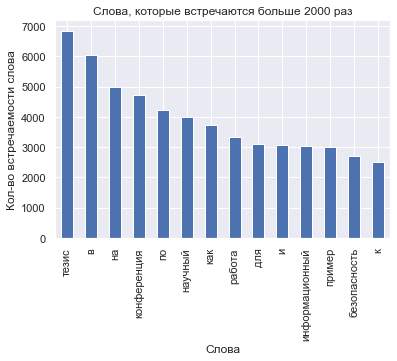

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.title('Слова, которые встречаются больше 2000 раз')

series_phrases.value_counts()[series_phrases.value_counts()>2000].plot.bar()

plt.ylabel('Кол-во встречаемости слова')
plt.xlabel('Слова')
plt.show();